In [1]:
import xlrd
import pylab as pylab
import numpy as np
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.interpolate
%matplotlib inline 

In [2]:
def getMatrixCanal(archivo,paso,canal):
    workbook= xlrd.open_workbook(archivo)
    sheet_names=workbook.sheet_names()
    #print sheet_names
    toma_sheet=workbook.sheet_by_name(sheet_names[0])
    promedio_sheet=workbook.sheet_by_name(sheet_names[1])
    suma_sheet=workbook.sheet_by_name(sheet_names[2])
    x_promedio=promedio_sheet.col_values(0)
    y_promedio=promedio_sheet.col_values(1)
    #canal= 6 a, 7 b, 8 ab
    canalB_promedio=promedio_sheet.col_values(canal)
    #CLeaning list
    del x_promedio[0]
    del y_promedio[0]
    del canalB_promedio[0]
    #arrays
    x=np.asarray(x_promedio)
    y=np.asarray(y_promedio)
    z=np.asarray(canalB_promedio)
    z_aux=z
    rows=[]
    aux=0
    rangofloat=(10/(paso*10))*4+1
    rango=int(rangofloat)
    print rango
    ind2remove=np.linspace(0,rango-1,rango)
    for i in range(rango):
        if aux==0:
            row=z_aux[0:rango]
            rows.append(row)
            z_aux=np.delete(z_aux,ind2remove)
            aux=1
        else:
            row=z_aux[0:rango]
            rowp=row[::-1]
            rows.append(rowp)
            z_aux=np.delete(z_aux,ind2remove)
            aux=0  
    matrix=np.matrix(rows)
    return matrix , rango

In [3]:
def graficar1(matrix,rango,titulo): 
    plt.matshow(matrix)
    plt.colorbar()
    ran=(rango-1)/4
    x=np.linspace(0,rango-1,ran-1)
    labels=np.linspace(-2,2,ran-1)
    plt.xticks(x,labels)
    plt.yticks(x,labels)
    plt.title(titulo)
    plt.xlabel('y')
    plt.ylabel('x')
    plt.show()
def graficar2(matrix,rango,titulo):  
    plt.matshow(matrix)
    plt.colorbar()
    ran=(rango-1)/4
    x=np.linspace(0,rango-1,ran)
    labels=np.linspace(-2,2,ran)
    plt.xticks(x,labels)
    plt.yticks(x,labels)
    plt.title(titulo)
    plt.xlabel('y')
    plt.ylabel('x')
    plt.show()

def graficar(m,ran,nom):
    if ran==41:
        graficar1(m,ran,nom)
    else:
        graficar2(m,ran,nom)

21


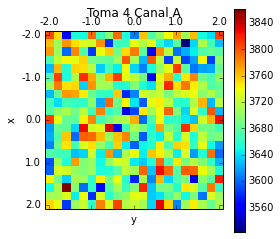

In [4]:
m,rango = getMatrixCanal('Data/first/Toma4_reducido.xlsx',0.2,6)
graficar(m,rango,'Toma 4 Canal A')

21


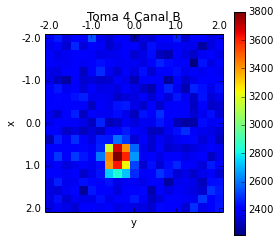

In [5]:
m,rango = getMatrixCanal('Data/first/Toma4_reducido.xlsx',0.2,7)
graficar(m,rango,'Toma 4 Canal B')

21


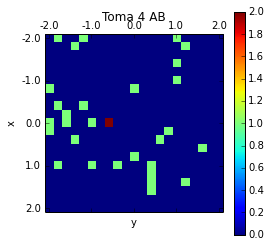

In [6]:
m,rango = getMatrixCanal('Data/first/Toma4_reducido.xlsx',0.2,8)
graficar(m,rango,'Toma 4 AB')

21


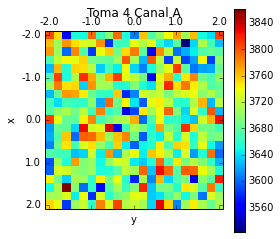

In [7]:
m,rango = getMatrixCanal('Data/first/Toma4_reducido.xlsx',0.2,6)
graficar(m,rango,'Toma 4 Canal A')

21


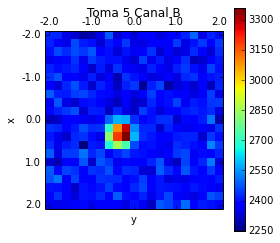

In [8]:
m,rango = getMatrixCanal('Data/first/Toma5_reducido.xlsx',0.2,7)
graficar(m,rango,'Toma 5 Canal B')

21


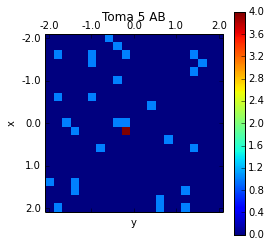

In [9]:
m,rango = getMatrixCanal('Data/first/Toma5_reducido.xlsx',0.2,8)
graficar(m,rango,'Toma 5 AB')

41


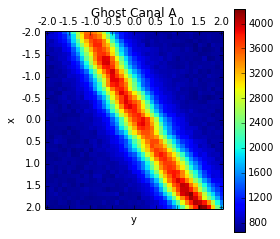

In [10]:
matrix,rango=getMatrixCanal('Data/first/Ghost_DetAV_DetCH_reducido.xlsx',0.1,6)
graficar(matrix,rango,'Ghost Canal A')

41


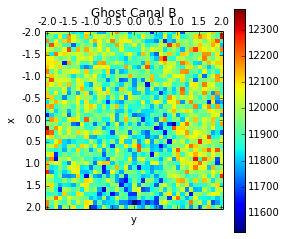

In [11]:
matrix, rango= getMatrixCanal('Data/first/Ghost_DetAV_DetCH_reducido.xlsx',0.1,7)
graficar(matrix,rango,'Ghost Canal B')

41


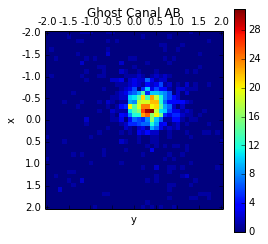

In [12]:
matrix, rango= getMatrixCanal('Data/first/Ghost_DetAV_DetCH_reducido.xlsx',0.1,8)
graficar(matrix,rango,'Ghost Canal AB')

41


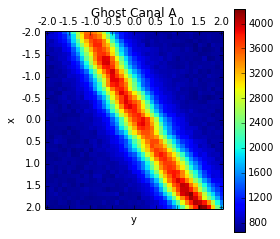

In [13]:
matrix, rango= getMatrixCanal('Data/first/Ghost_DetAV_DetCH_reducido.xlsx',0.1,6)
graficar(matrix,rango,'Ghost Canal A')

41


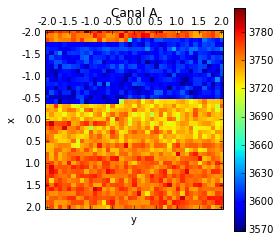

In [14]:
m,r=getMatrixCanal('Data/mask1/UbicacionDefinitiva_reducido.xlsx',0.1,6)
graficar(m,r,'Canal A')

41


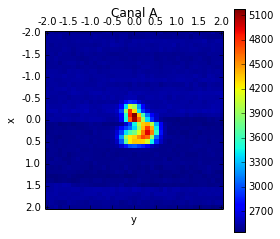

In [15]:
m,r=getMatrixCanal('Data/mask1/UbicacionDefinitiva_reducido.xlsx',0.1,7)
graficar(m,r,'Canal A')

41


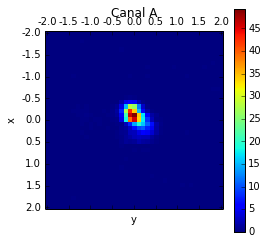

In [16]:
m,r=getMatrixCanal('Data/mask1/UbicacionDefinitiva_reducido.xlsx',0.1,8)
graficar(m,r,'Canal A')

41


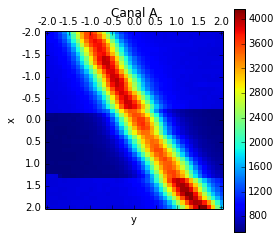

In [17]:
m,r=getMatrixCanal('Data/mask1/ghostinterrogacion_reducido.xlsx',0.1,6)
graficar(m,r,'Canal A')

41


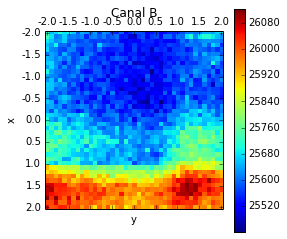

In [18]:
m,r=getMatrixCanal('Data/mask1/ghostinterrogacion_reducido.xlsx',0.1,7)
graficar(m,r,'Canal B')

41


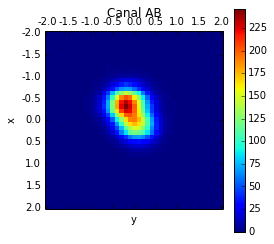

In [19]:
m,r=getMatrixCanal('Data/mask1/ghostinterrogacion_reducido.xlsx',0.1,8)
graficar(m,r,'Canal AB')